In [123]:
import numpy as np
import random

def step(rels, pb, pr, pn, r):
    baby_index = random.randrange(0,N)
    parent_index = random.choice(list(range(0, baby_index))
                                 + list(range(baby_index+1, N)))
    
    #killing the guy. he is not a friend of anybody now
    rels[:,baby_index] = 0
    rels[baby_index] = 0 
        
    parent_friends = rels[parent_index]==1 

    rels[baby_index, r<pr]=1
    rels[r<pr, baby_index]=1
    
    rels[baby_index, parent_index] = 1
    rels[parent_index, baby_index] = 1

    rels[baby_index, baby_index] = 0

    #for parent friends
    l = len(rels[baby_index, parent_friends])
    r = np.random.random(size=l)
    r = r<pn
    rels[baby_index, parent_friends] = r
    rels[parent_friends, baby_index] = r

In [143]:
%%time
def run(pb, pr, pn):
    # init population
    rels = np.zeros((N,N))
#     rs = np.random.random(size=N*steps)
    
    #run steps
    for i in range(steps):
#         r = rs[i*N:i*N+N]
        r = np.random.random(size=N)
#         step(rels,pb, pr, pn, r)

    return sum([sum(row) for row in rels])/N #degree

N = 100
steps = 2000
pb = 1

pr = 0.5
pr05 = [run(pb, pr, pn) for pn in np.arange(0,1.05,0.05)]
print(pr05)

pr = 0.3
pr03 = [run(pb, pr, pn) for pn in np.arange(0,1.05,0.05)]
print(pr03)

pr = 0.1
pr01 = [run(pb, pr, pn) for pn in np.arange(0,1.05,0.05)]
print(pr01)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
CPU times: user 432 ms, sys: 4.32 ms, total: 437 ms
Wall time: 443 ms


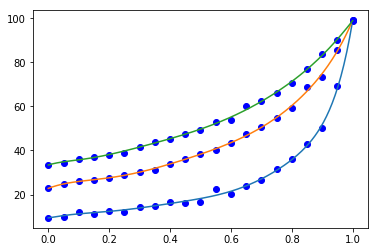

In [125]:
%matplotlib inline
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

def drawFor(x,y):
    for x1, y1 in zip(x, y):
        plt.plot(x1, y1, 'bo')
    x_new = np.linspace(x[0], x[-1], num=len(x)*10)
    coefs = poly.polyfit(x, y, 8)
    ffit = poly.polyval(x_new, coefs)
    plt.plot(x_new, ffit)

drawFor(np.arange(0,1.05,0.05),pr01)
drawFor(np.arange(0,1.05,0.05),pr03)
drawFor(np.arange(0,1.05,0.05),pr05)
plt.show()

In [144]:
%timeit np.random.random(size=1000*100000)
%timeit for _ in range(1000): np.random.random(size=100000)

1 loop, best of 3: 1.52 s per loop
1 loop, best of 3: 1.08 s per loop


In [149]:
N = 100
steps = 2000
times = 50
pr,pn = 3,3
%timeit np.random.random(size=N*steps*times*pr*pn)
%timeit for _ in range(steps*times*pr*pn): np.random.random(size=N)
%timeit for _ in range(N*steps*times*pr*pn): random.random()

1 loop, best of 3: 1.36 s per loop
1 loop, best of 3: 2.4 s per loop
1 loop, best of 3: 10.7 s per loop
